In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

In [2]:
 data = pd.read_csv(r"C:\Users\ravin\Music\India_Crime - Copy\17_Case_reported_and_value_of_property_taken_away_by_place_of_occurrence_2001_2012.csv")

In [3]:
data

,STATE/UT,YEAR,Place Of Occurrence,Dacoity (Section 395-398 IPC) - Number of cases registered,Dacoity (Section 395-398 IPC) - Value Of Property Stolen (in rupees),"Robbery(Section 392-394, 397, 398 IPC) - Number of cases registered","Robbery(Section 392-394, 397, 398 IPC) - Value Of Property Stolen (in rupees)","Burglary(Section 449-452, 454, 455, 457-460 IPC) - Number of cases registered","Burglary(Section 449-452, 454, 455, 457-460 IPC) - Value Of Property Stolen (in rupees)",Theft (Section 379-382 IPC) - Number of cases registered,Theft (Section 379-382 IPC) - Value Of Property Stolen (in rupees)
0,Andhra Pradesh,2001,RESIDENTIAL PREMISES,100,4446961,177,5962460,5158,105324332,4257,53517835
1,Andhra Pradesh,2001,HIGH-WAY,57,5340335,172,6364866,31,2000574,74,1593092
2,Andhra Pradesh,2001,RIVER & SEA,2,145345,11,209330,101,1412516,110,1610200
3,Andhra Pradesh,2001,RAILWAYS,8,1750800,19,304336,6,24392,943,16418110
4,Andhra Pradesh,2001,RUNNING TRAINS,5,75000,3,164000,0,0,296,6170175
...,...,...,...,...,...,...,...,...,...,...,...
4339,Puducherry,2012,BANKS,0,0,0,0,0,0,0,0
4340,Puducherry,2012,COMMERCIAL ESTABLISHMENTS,2,58000,4,197230,26,2117964,20,647043
4341,Puducherry,2012,OTHER PLACES,2,575000,8,113100,4,25500,596,19689249
4342,Puducherry,2012,TOTAL (MANUAL),5,683000,16,2520330,77,12168314,658,23866392


# Data Preprocessing

In [4]:
data['Place Of Occurrence'].unique().tolist()

['RESIDENTIAL PREMISES',
 'HIGH-WAY',
 'RIVER & SEA',
 'RAILWAYS',
 'RUNNING TRAINS',
 'OTHERS RLY.',
 'BANKS',
 'COMMERCIAL ESTABLISHMENTS',
 'OTHER PLACES',
 'TOTAL (MANUAL)',
 'TOTAL COMPUTER FROM 1 TO 7']

In [5]:
data1 = data[data['Place Of Occurrence']!='TOTAL COMPUTER FROM 1 TO 7']
data2 = data1[data1['Place Of Occurrence']!='TOTAL (MANUAL)']

In [6]:
data3 = data2.reset_index()
data3 = data3.drop(['index'], axis=1)

In [7]:
data3

,STATE/UT,YEAR,Place Of Occurrence,Dacoity (Section 395-398 IPC) - Number of cases registered,Dacoity (Section 395-398 IPC) - Value Of Property Stolen (in rupees),"Robbery(Section 392-394, 397, 398 IPC) - Number of cases registered","Robbery(Section 392-394, 397, 398 IPC) - Value Of Property Stolen (in rupees)","Burglary(Section 449-452, 454, 455, 457-460 IPC) - Number of cases registered","Burglary(Section 449-452, 454, 455, 457-460 IPC) - Value Of Property Stolen (in rupees)",Theft (Section 379-382 IPC) - Number of cases registered,Theft (Section 379-382 IPC) - Value Of Property Stolen (in rupees)
0,Andhra Pradesh,2001,RESIDENTIAL PREMISES,100,4446961,177,5962460,5158,105324332,4257,53517835
1,Andhra Pradesh,2001,HIGH-WAY,57,5340335,172,6364866,31,2000574,74,1593092
2,Andhra Pradesh,2001,RIVER & SEA,2,145345,11,209330,101,1412516,110,1610200
3,Andhra Pradesh,2001,RAILWAYS,8,1750800,19,304336,6,24392,943,16418110
4,Andhra Pradesh,2001,RUNNING TRAINS,5,75000,3,164000,0,0,296,6170175
...,...,...,...,...,...,...,...,...,...,...,...
3774,Puducherry,2012,RUNNING TRAINS,0,0,0,0,0,0,0,0
3775,Puducherry,2012,OTHERS RLY.,0,0,0,0,0,0,0,0
3776,Puducherry,2012,BANKS,0,0,0,0,0,0,0,0
3777,Puducherry,2012,COMMERCIAL ESTABLISHMENTS,2,58000,4,197230,26,2117964,20,647043


# DISTRIBUTION OF DATA

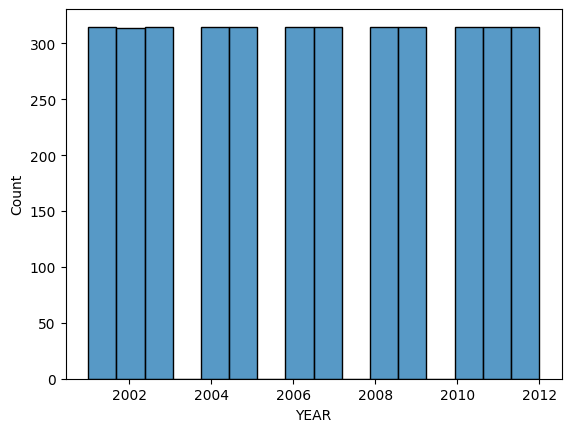

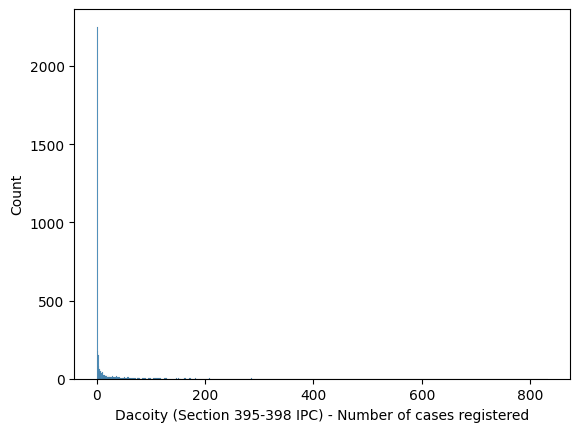

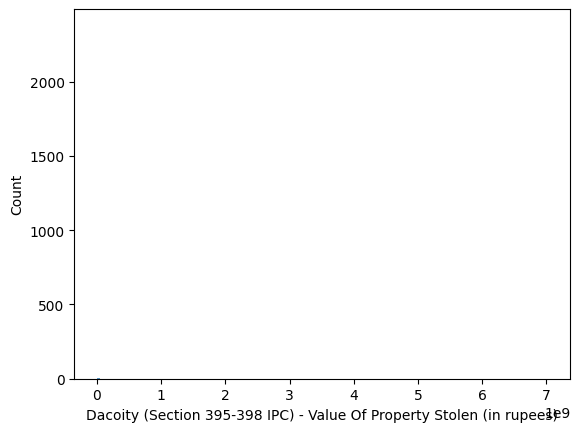

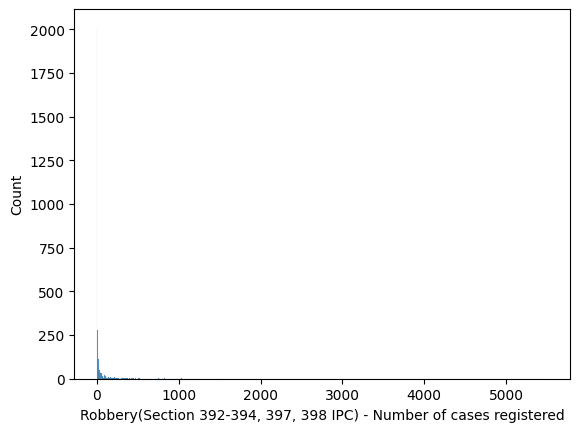

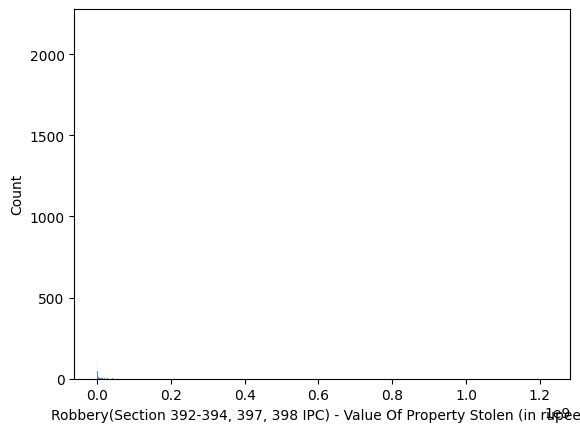

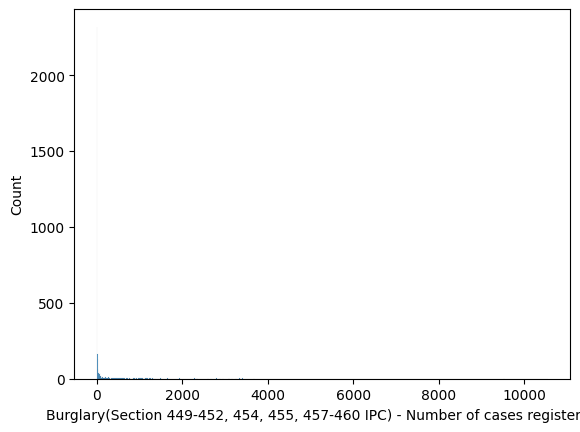

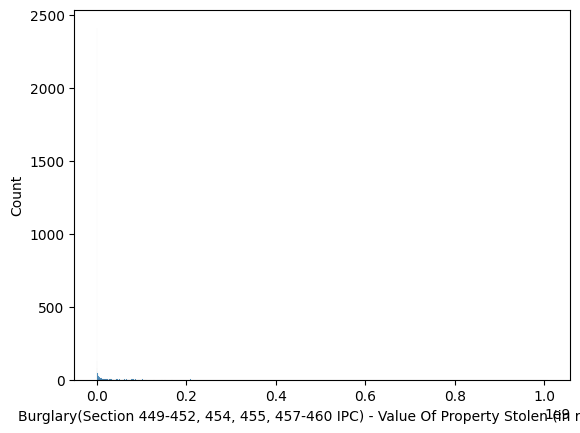

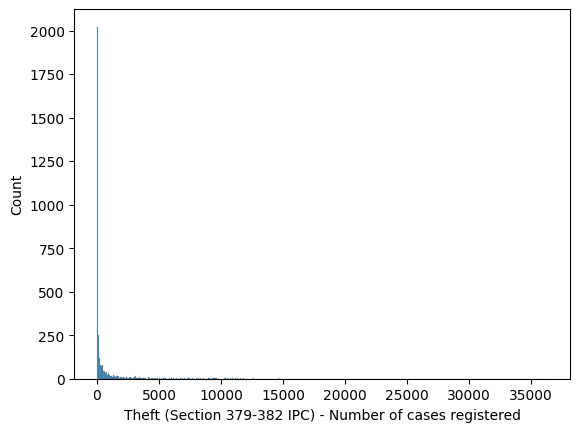

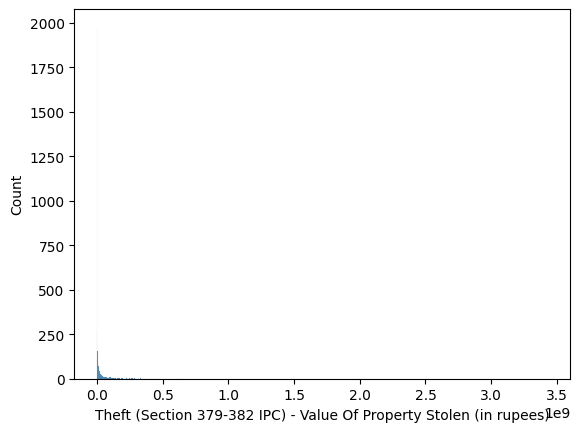

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in data3.columns:
    if data3[column].dtypes != 'object':
        sns.histplot(data=data3, x=column)
        plt.show()

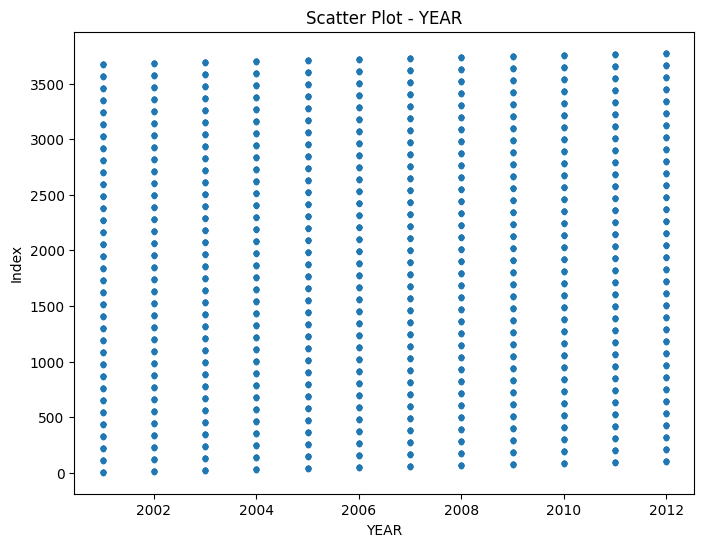

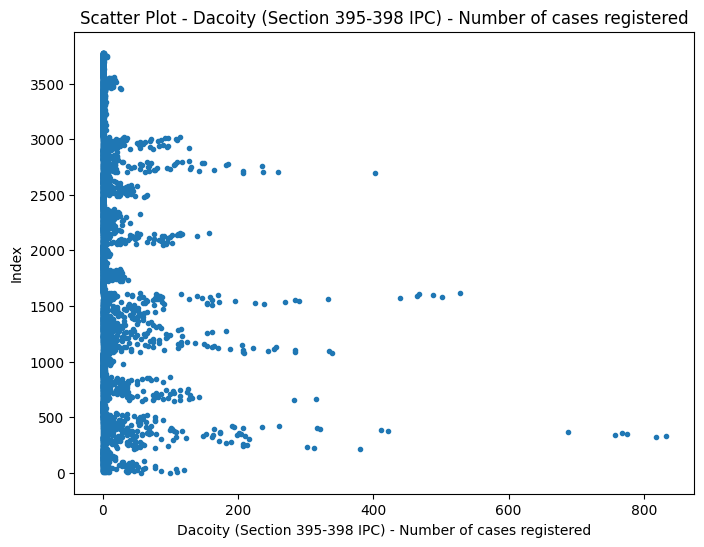

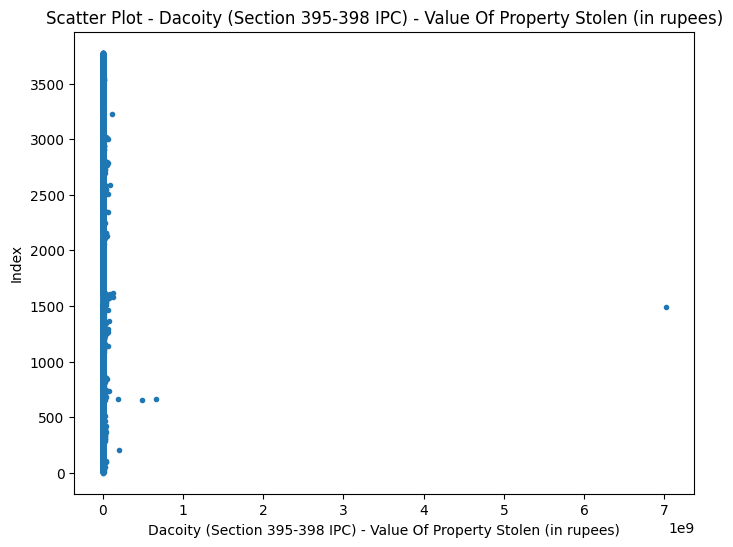

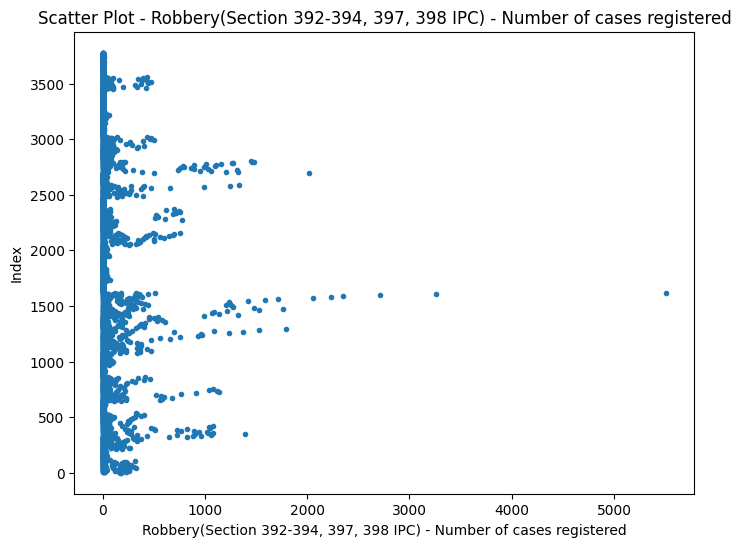

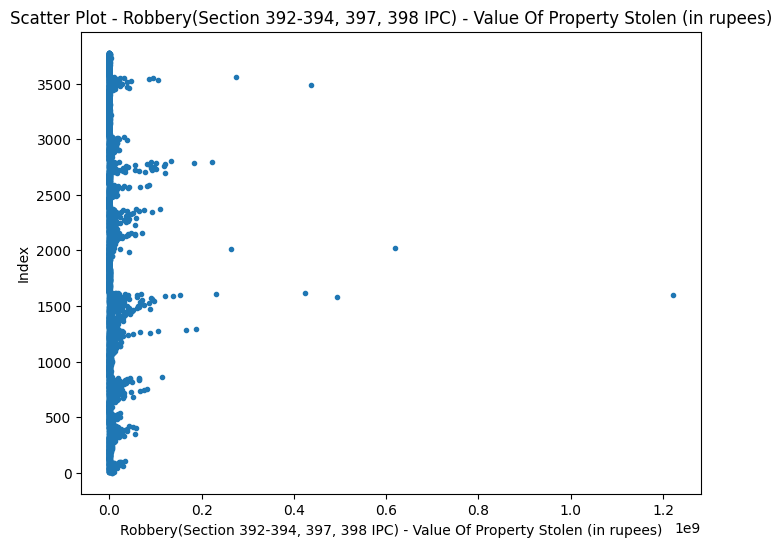

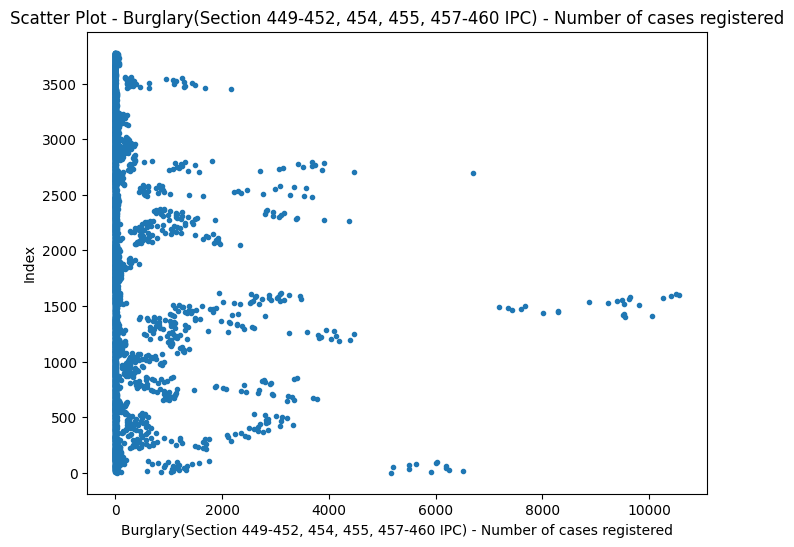

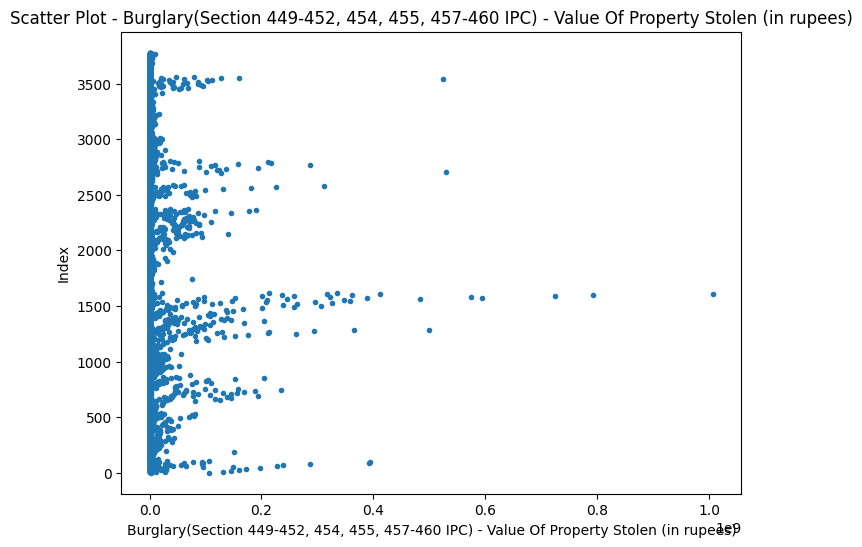

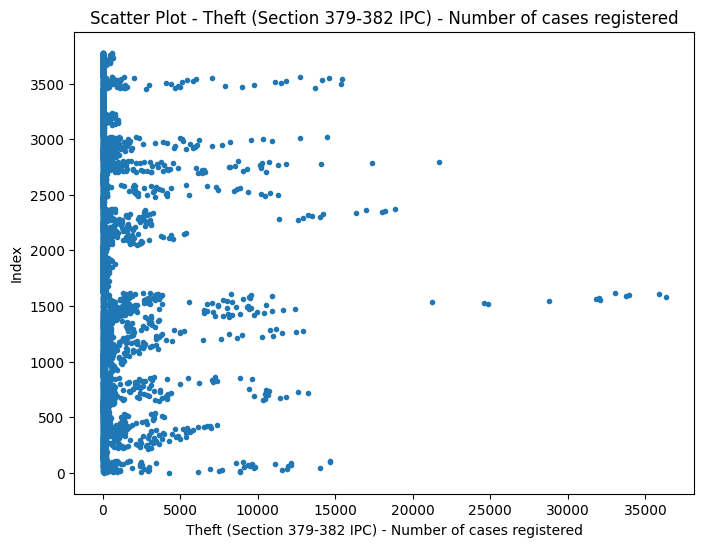

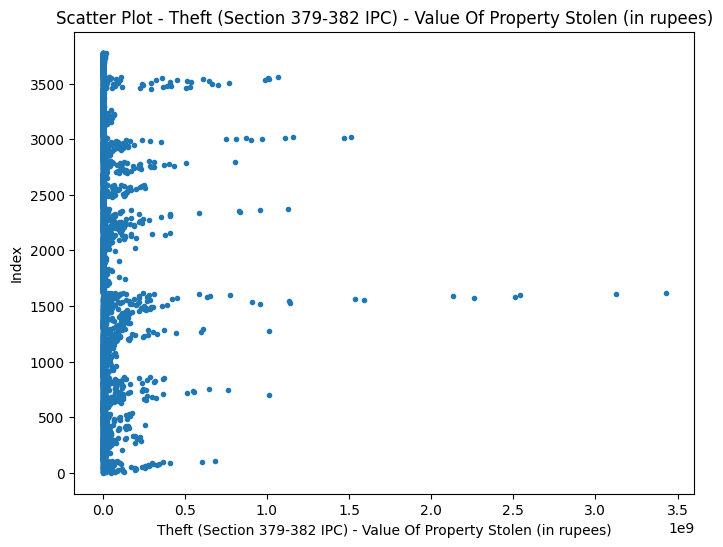

In [9]:
import matplotlib.pyplot as plt

for column in data3.columns:
    if data3[column].dtype != 'object':
        plt.figure(figsize=(8, 6))
        plt.scatter(data3[column], range(len(data3)), marker='.')
        plt.title(f"Scatter Plot - {column}")
        plt.xlabel(column)
        plt.ylabel('Index')
        plt.show()


# outliers removal

In [10]:
import numpy as np

In [11]:
mean = np.mean(data3)
std = np.std(data3)
threshold = 3
z_scores = (data3 - mean) / std

C:\Users\ravin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\ravin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\ravin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=o

In [12]:
outliers = data3[np.abs(z_scores) > threshold]
df = data3[~data3.isin(outliers)].dropna()

In [13]:
df1 = df.reset_index()
df2 = df1.drop(['index'], axis=1)

In [14]:
df2

,STATE/UT,YEAR,Place Of Occurrence,Dacoity (Section 395-398 IPC) - Number of cases registered,Dacoity (Section 395-398 IPC) - Value Of Property Stolen (in rupees),"Robbery(Section 392-394, 397, 398 IPC) - Number of cases registered","Robbery(Section 392-394, 397, 398 IPC) - Value Of Property Stolen (in rupees)","Burglary(Section 449-452, 454, 455, 457-460 IPC) - Number of cases registered","Burglary(Section 449-452, 454, 455, 457-460 IPC) - Value Of Property Stolen (in rupees)",Theft (Section 379-382 IPC) - Number of cases registered,Theft (Section 379-382 IPC) - Value Of Property Stolen (in rupees)
0,Andhra Pradesh,2001,HIGH-WAY,57.0,5340335.0,172.0,6364866.0,31.0,2000574.0,74.0,1593092.0
1,Andhra Pradesh,2001,RIVER & SEA,2.0,145345.0,11.0,209330.0,101.0,1412516.0,110.0,1610200.0
2,Andhra Pradesh,2001,RAILWAYS,8.0,1750800.0,19.0,304336.0,6.0,24392.0,943.0,16418110.0
3,Andhra Pradesh,2001,RUNNING TRAINS,5.0,75000.0,3.0,164000.0,0.0,0.0,296.0,6170175.0
4,Andhra Pradesh,2001,OTHERS RLY.,3.0,1675800.0,16.0,140336.0,6.0,24392.0,647.0,10247935.0
...,...,...,...,...,...,...,...,...,...,...,...
3505,Puducherry,2012,RUNNING TRAINS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3506,Puducherry,2012,OTHERS RLY.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3507,Puducherry,2012,BANKS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3508,Puducherry,2012,COMMERCIAL ESTABLISHMENTS,2.0,58000.0,4.0,197230.0,26.0,2117964.0,20.0,647043.0


# LOSS OF INFORMATION

In [15]:
269/3510*100

7.663817663817664

# After removing the outliers

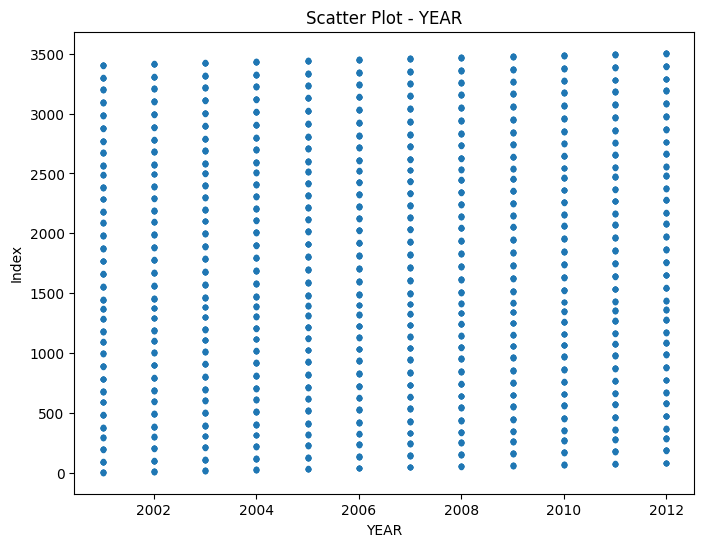

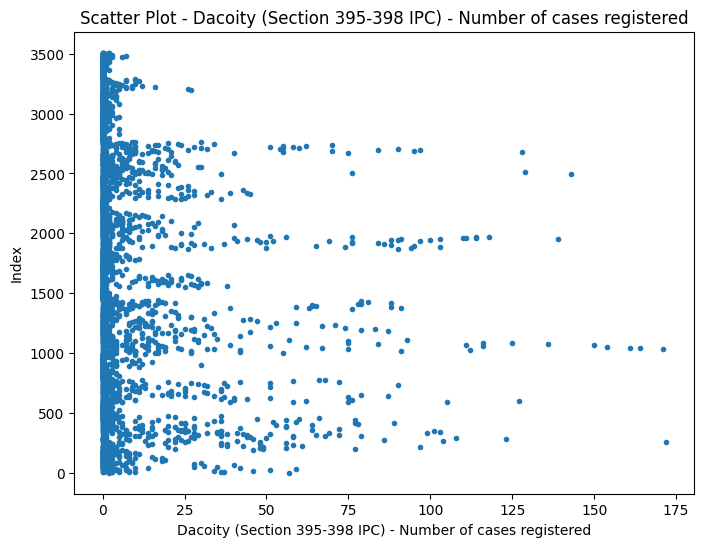

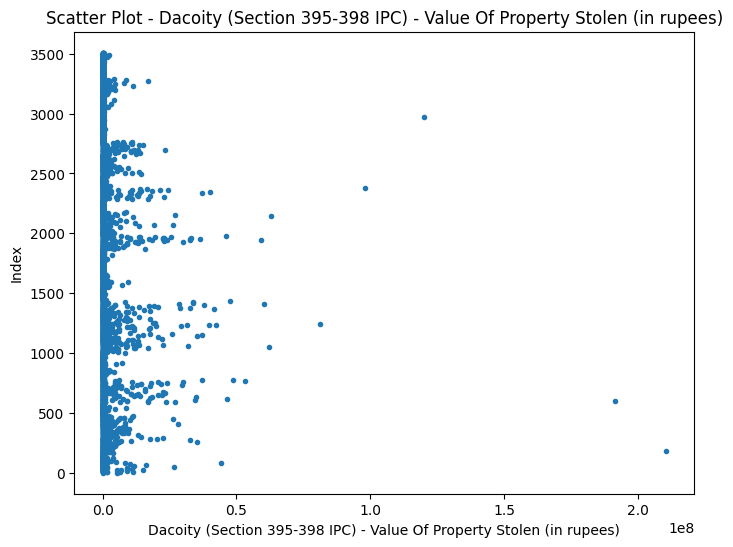

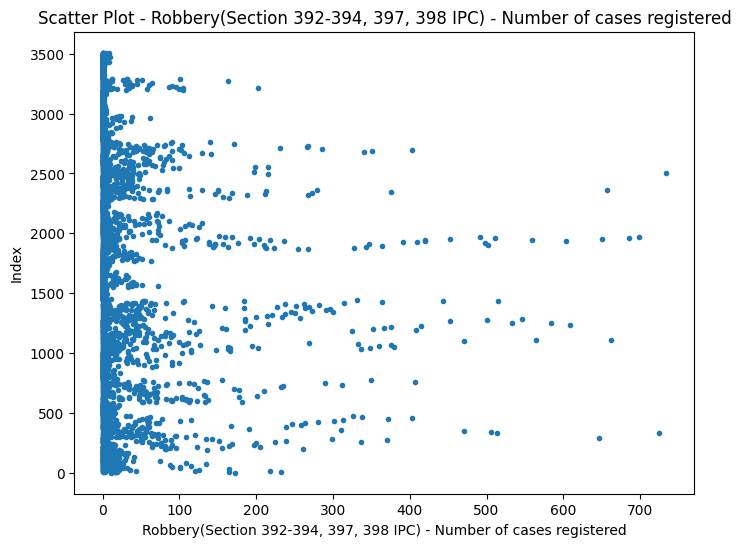

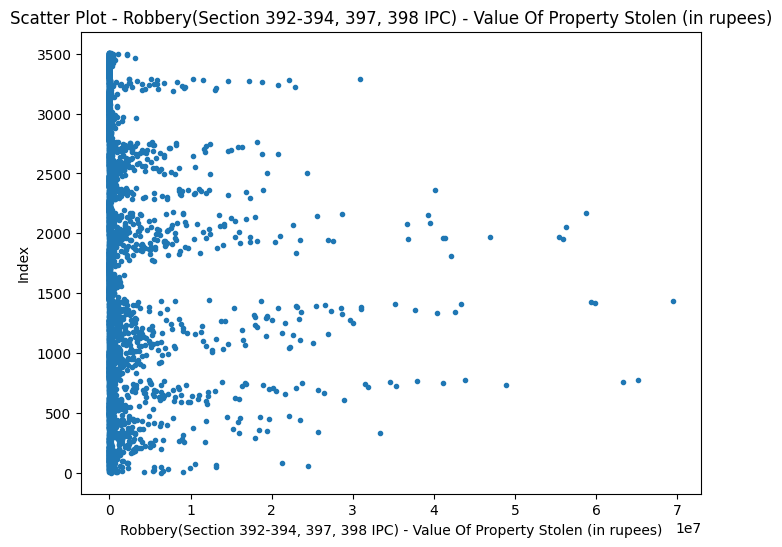

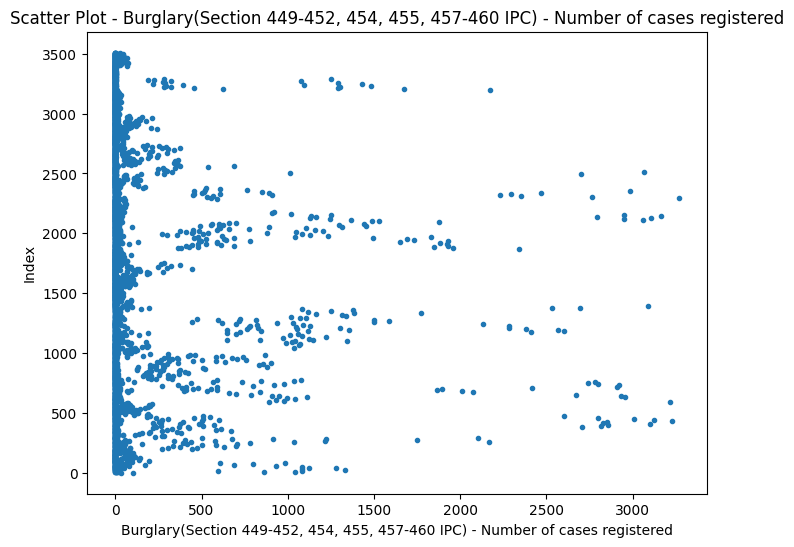

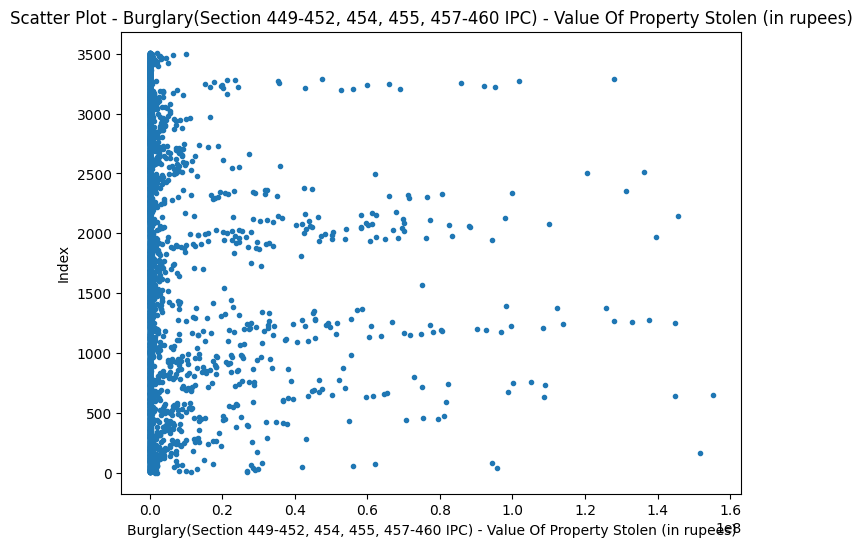

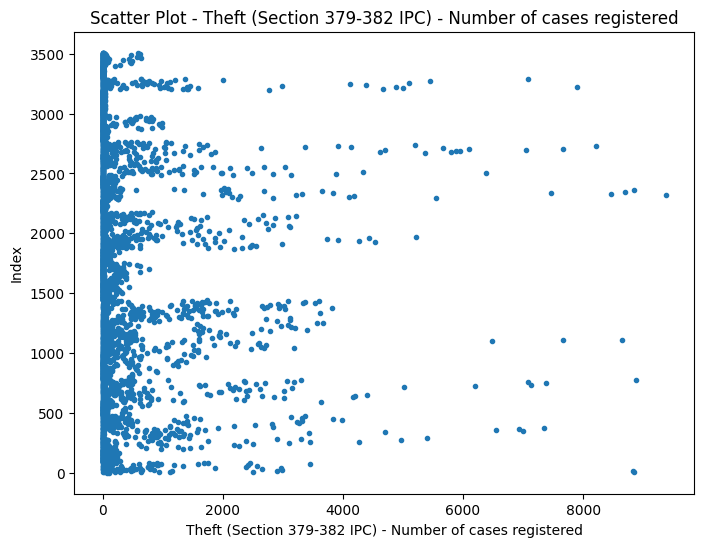

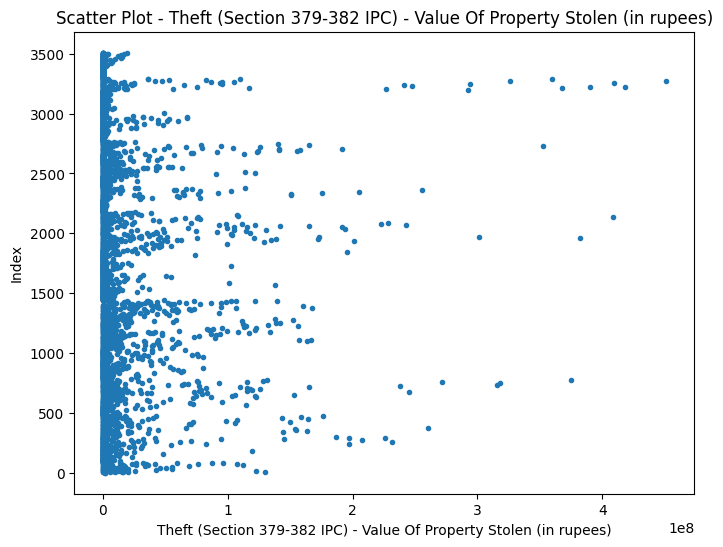

In [16]:
import matplotlib.pyplot as plt

for column in df2.columns:
    if df2[column].dtype != 'object':
        plt.figure(figsize=(8, 6))
        plt.scatter(df2[column], range(len(df2)), marker='.')
        plt.title(f"Scatter Plot - {column}")
        plt.xlabel(column)
        plt.ylabel('Index')
        plt.show()

# encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df2['STATE/UT'] = label.fit_transform(df2['STATE/UT'])
df2['Place Of Occurrence'] = label.fit_transform(df2['Place Of Occurrence'])

In [18]:
df2

,STATE/UT,YEAR,Place Of Occurrence,Dacoity (Section 395-398 IPC) - Number of cases registered,Dacoity (Section 395-398 IPC) - Value Of Property Stolen (in rupees),"Robbery(Section 392-394, 397, 398 IPC) - Number of cases registered","Robbery(Section 392-394, 397, 398 IPC) - Value Of Property Stolen (in rupees)","Burglary(Section 449-452, 454, 455, 457-460 IPC) - Number of cases registered","Burglary(Section 449-452, 454, 455, 457-460 IPC) - Value Of Property Stolen (in rupees)",Theft (Section 379-382 IPC) - Number of cases registered,Theft (Section 379-382 IPC) - Value Of Property Stolen (in rupees)
0,1,2001,2,57.0,5340335.0,172.0,6364866.0,31.0,2000574.0,74.0,1593092.0
1,1,2001,7,2.0,145345.0,11.0,209330.0,101.0,1412516.0,110.0,1610200.0
2,1,2001,5,8.0,1750800.0,19.0,304336.0,6.0,24392.0,943.0,16418110.0
3,1,2001,8,5.0,75000.0,3.0,164000.0,0.0,0.0,296.0,6170175.0
4,1,2001,4,3.0,1675800.0,16.0,140336.0,6.0,24392.0,647.0,10247935.0
...,...,...,...,...,...,...,...,...,...,...,...
3505,26,2012,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3506,26,2012,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3507,26,2012,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3508,26,2012,1,2.0,58000.0,4.0,197230.0,26.0,2117964.0,20.0,647043.0


# Normalisation of data

In [19]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer

In [20]:
ss = RobustScaler()
scaled = pd.DataFrame(ss.fit_transform(df2))

# after Normalisation of dataset

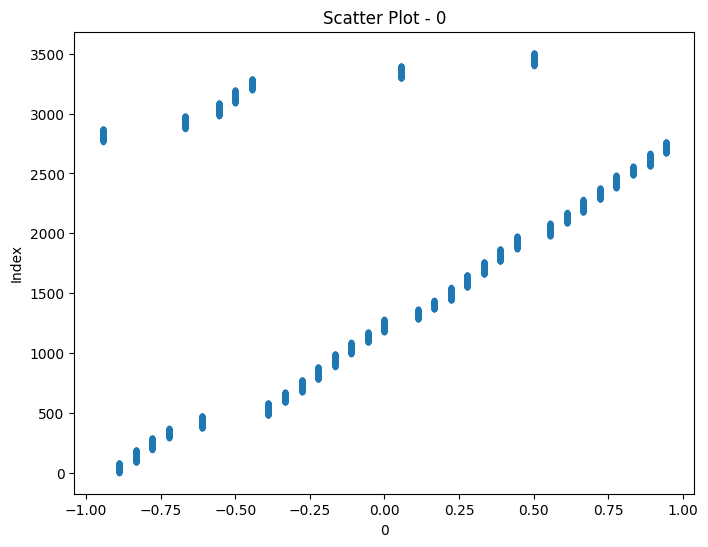

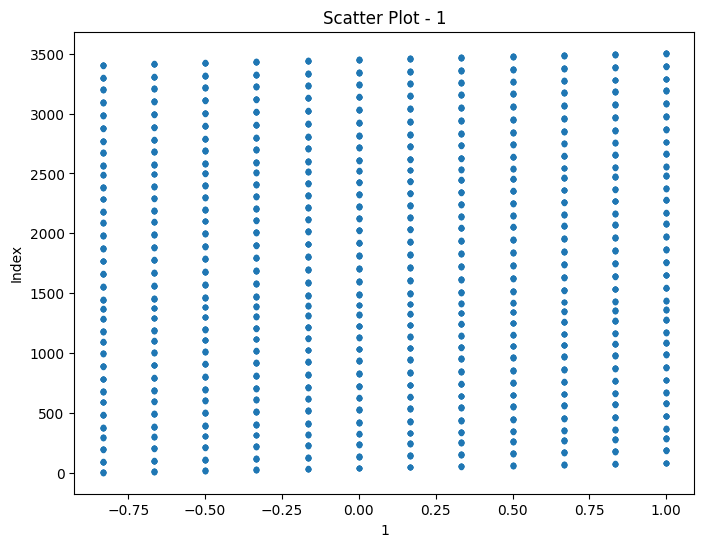

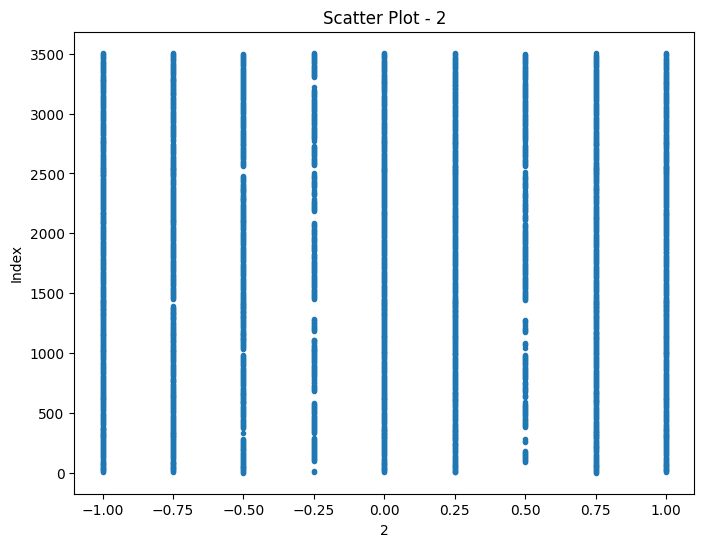

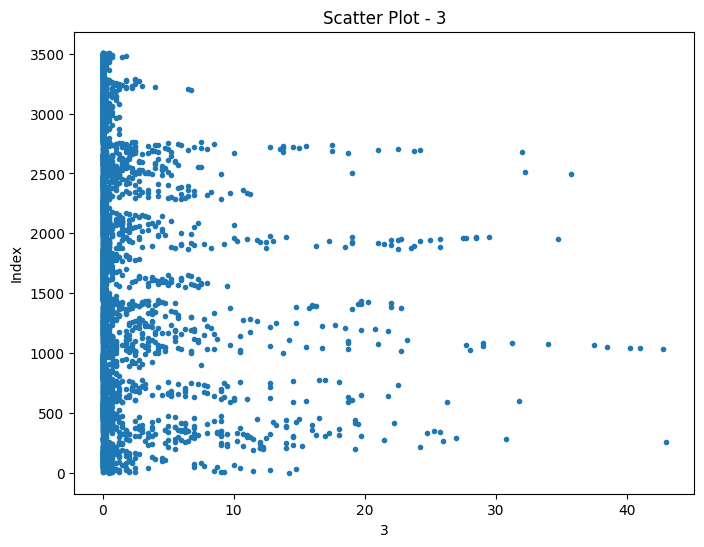

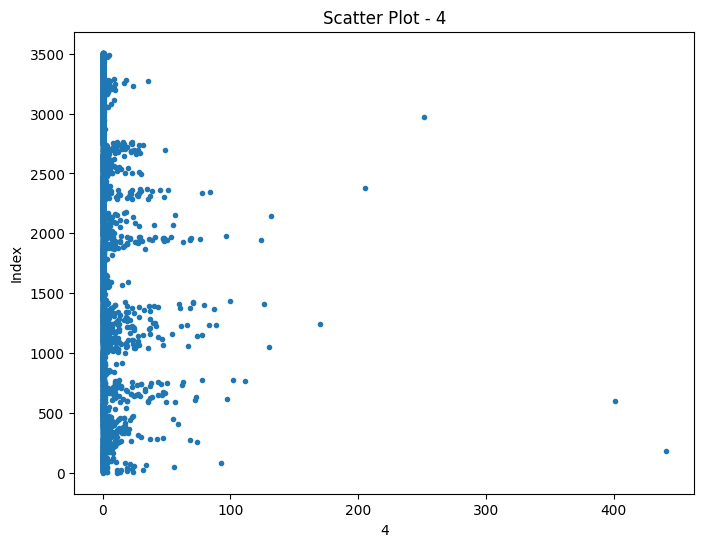

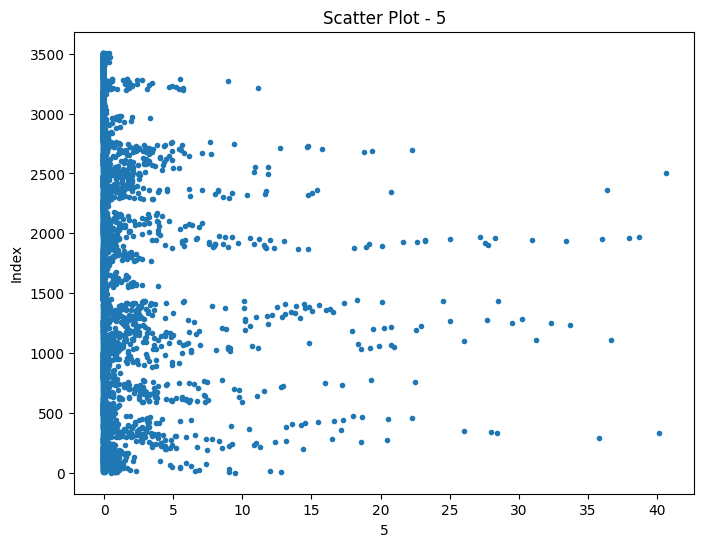

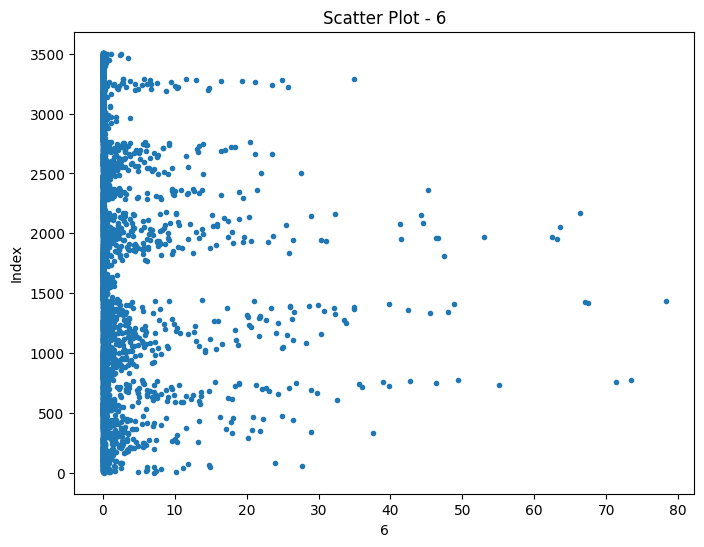

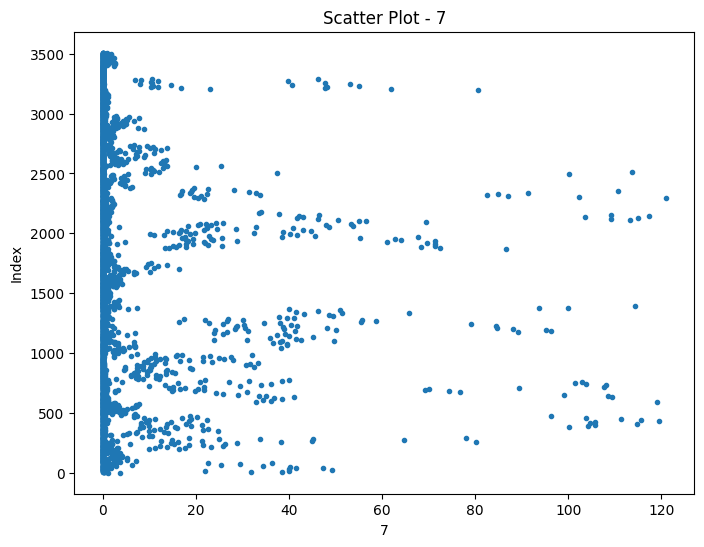

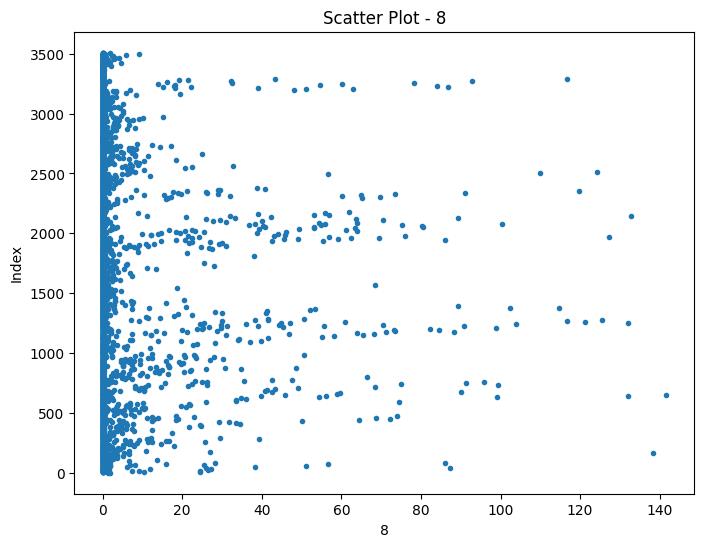

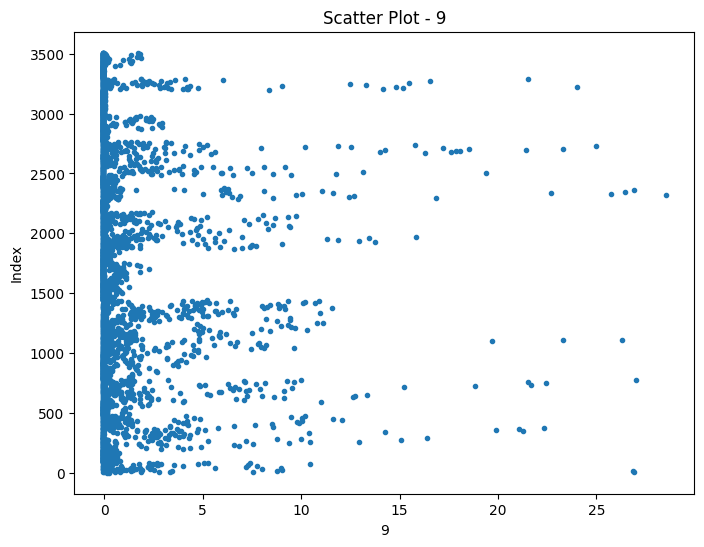

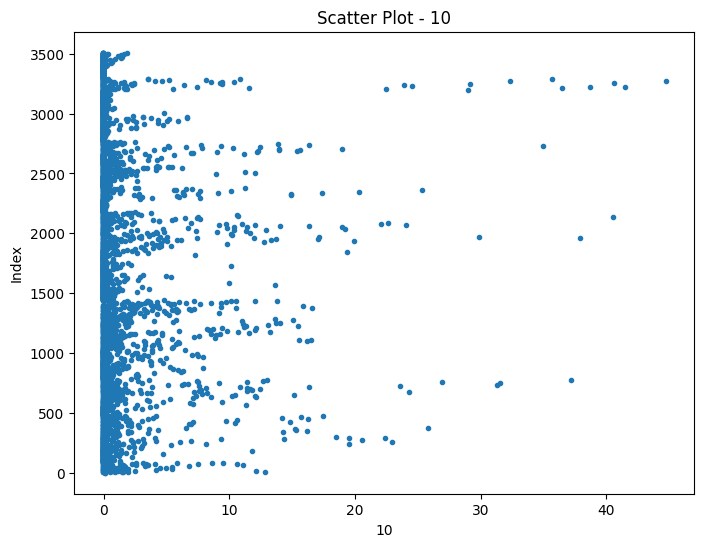

In [21]:
import matplotlib.pyplot as plt

for column in scaled.columns:
    if scaled[column].dtype != 'object':
        plt.figure(figsize=(8, 6))
        plt.scatter(scaled[column], range(len(scaled)), marker='.')
        plt.title(f"Scatter Plot - {column}")
        plt.xlabel(column)
        plt.ylabel('Index')
        plt.show()


# Elbow Method

In [22]:
from sklearn.cluster import KMeans

In [23]:
elbow = pd.DataFrame()

for i in range(1,15):
    kmean = KMeans(n_clusters=i, random_state=333)
    model = kmean.fit(scaled)
    elbow.at[i,'k'] = i
    elbow.at[i, 'inertia'] = round(model.inertia_)/10000000
print(elbow)

       k   inertia
1    1.0  0.290536
2    2.0  0.165111
3    3.0  0.122393
4    4.0  0.094659
5    5.0  0.075600
6    6.0  0.066054
7    7.0  0.059893
8    8.0  0.054929
9    9.0  0.050629
10  10.0  0.046490
11  11.0  0.043102
12  12.0  0.039969
13  13.0  0.038324
14  14.0  0.036222


Text(0, 0.5, 'inertia')

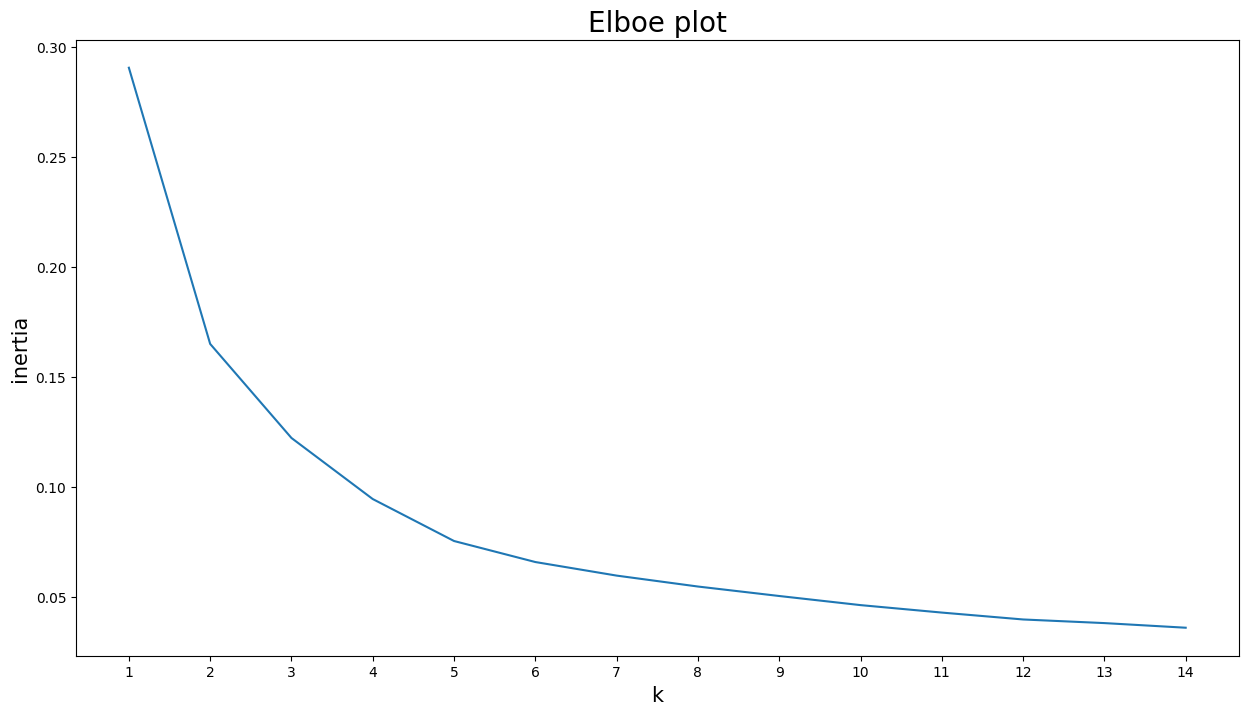

In [24]:
plt.figure(figsize=(15,8))
plt.title('Elboe plot', size=20)
plt.plot(elbow['k'], elbow['inertia'])
plt.xticks(elbow['k'])
plt.xlabel('k', size=15)
plt.ylabel('inertia', size=15)

# Model Building

In [25]:
df1 = pd.DataFrame()
kmeans = KMeans(n_clusters = 3,  random_state = 42)

y_kmeans = kmeans.fit_predict(scaled)

df1['y_kmeans']=y_kmeans

df1['y_kmeans'].value_counts()

0    3252
1     202
2      56
Name: y_kmeans, dtype: int64

# Accuracy Score

In [26]:
from sklearn.metrics import silhouette_score


silhouette_avg = silhouette_score(scaled, y_kmeans)
print("Silhouette Coefficient:", silhouette_avg)


Silhouette Coefficient: 0.8340225420527774


# final

In [27]:
final = df2.copy()

In [29]:
final1 = final.reset_index()
final2 = final1.drop(['index'], axis=1)

In [30]:
list1 = y_kmeans.tolist()

In [31]:
final2['mean'] = list1

In [32]:
cluster1 = final2[final2['mean']==0]
cluster3 = final2[final2['mean']==2]
cluster2 = final2[final2['mean']==1]

In [33]:
cluster2

,STATE/UT,YEAR,Place Of Occurrence,Dacoity (Section 395-398 IPC) - Number of cases registered,Dacoity (Section 395-398 IPC) - Value Of Property Stolen (in rupees),"Robbery(Section 392-394, 397, 398 IPC) - Number of cases registered","Robbery(Section 392-394, 397, 398 IPC) - Value Of Property Stolen (in rupees)","Burglary(Section 449-452, 454, 455, 457-460 IPC) - Number of cases registered","Burglary(Section 449-452, 454, 455, 457-460 IPC) - Value Of Property Stolen (in rupees)",Theft (Section 379-382 IPC) - Number of cases registered,Theft (Section 379-382 IPC) - Value Of Property Stolen (in rupees),mean
6,1,2001,1,10.0,11300237.0,16.0,816006.0,1041.0,26920123.0,2502.0,20121181.0,1
14,1,2002,1,1.0,370000.0,19.0,1588507.0,1083.0,26763811.0,2911.0,26244769.0,1
22,1,2003,1,5.0,15041740.0,16.0,594264.0,1330.0,29024934.0,2991.0,42500176.0,1
29,1,2004,1,4.0,175000.0,18.0,736388.0,1083.0,29873637.0,2656.0,55520704.0,1
36,1,2005,1,14.0,1156420.0,27.0,674017.0,1279.0,28539038.0,1872.0,46171901.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3248,9,2007,6,10.0,4602500.0,45.0,5455645.0,1433.0,66061142.0,4113.0,293707988.0,1
3256,9,2008,6,4.0,7936000.0,64.0,6740150.0,1292.0,85844391.0,5106.0,409334611.0,1
3270,9,2009,1,7.0,16800000.0,31.0,17182000.0,321.0,35403954.0,965.0,325644524.0,1
3271,9,2010,6,11.0,2949500.0,163.0,14583739.0,1074.0,101775012.0,5454.0,451013365.0,1
